# Ford GoBike Data Exploration  
### Part II – Explanatory Slide Deck  
**By: Sultan Alanazi**

#### Dataset Overview
>This explanatory analysis uses the cleaned dataset produced in Part I, containing **160,184 bike-share trips**.
>This presentation uses a cleaned and enhanced dataset of 160,184 Bay Wheels bike-share trips. The dataset includes:
>* Trip duration in seconds, minutes, and hours
>* Timestamps for trip start and end
>* Start/end station details (ID, name, coordinates)
>* Rider attributes (age, gender, user type)
>* Engineered features:
>   - member_age 
>   - duration_minute
>   - duration_hour
>   - start_hour
>   - weekday
>#### **Source**
>* The dataset originates from the official **Bay Wheels** (formerly Ford GoBike) system.
>* This cleaned dataset provides accurate, consistent, and analysis-ready information for identifying meaningful riding patterns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_pickle(r'dataset/201902-fordgobike-tripdata_v20251118.pkl') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154893 entries, 0 to 154892
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             154893 non-null  int64         
 1   start_time               154893 non-null  datetime64[ns]
 2   end_time                 154893 non-null  datetime64[ns]
 3   start_station_id         154893 non-null  float64       
 4   start_station_name       154893 non-null  object        
 5   start_station_latitude   154893 non-null  float64       
 6   start_station_longitude  154893 non-null  float64       
 7   end_station_id           154893 non-null  float64       
 8   end_station_name         154893 non-null  object        
 9   end_station_latitude     154893 non-null  float64       
 10  end_station_longitude    154893 non-null  float64       
 11  bike_id                  154893 non-null  int64         
 12  user_type       

## Key Questions & Summary of Findings

#### **Q1: How does trip duration differ across genders?**
- All genders have similar median trip durations.
- Female and "Other" riders show higher variability and more long-duration outliers.
#### **Q2: When do Subscribers vs. Customers typically ride?**
- **Subscribers** ride mostly during **8 AM** and **5–6 PM** → commuting pattern.
- **Customers** ride mainly between **10 AM – 5 PM** → recreational usage.
#### **Q3: How does trip duration vary by user type across the week?**
- **Subscribers**: short, consistent trips all week.
- **Customers**: longer trips, especially on **weekends**.
#### **Q4: How does hourly bike usage vary by gender?**  
- Male riders dominate overall, but all genders follow similar hourly patterns.  
#### **Q5: How does median trip duration vary by user type and gender?**  
- **Customers** take longer trips than subscribers across all genders.  
- Gender differences are small compared to differences between user types.  
These insights form the story that will be visualized in the following slides.


## (Visualization 1) Trip Duration by Gender
>* This boxplot compares trip duration between male, female, and “other” riders.
>* It highlights differences in distribution, variability, and long-duration outliers.

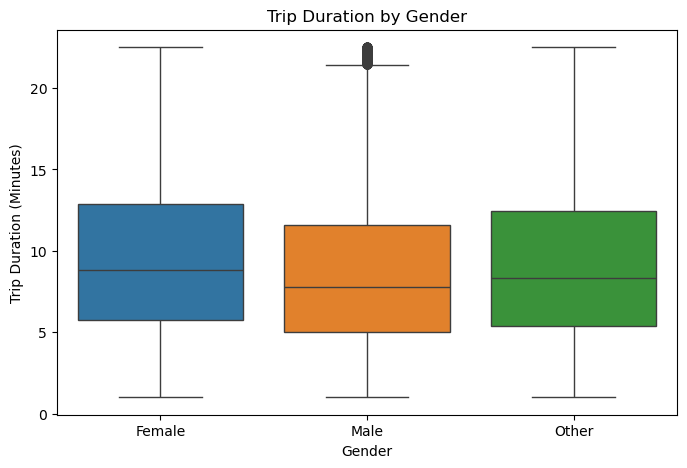

In [3]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='member_gender', y='duration_minute',hue= 'member_gender')
plt.title("Trip Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Trip Duration (Minutes)")
plt.show()

## (Visualization 2) Riding Times by User Type

This plot shows hourly ride frequencies for Subscribers and Customers:
>- Subscribers show strong commute peaks.
>- Customers ride more frequently in the middle of the day.


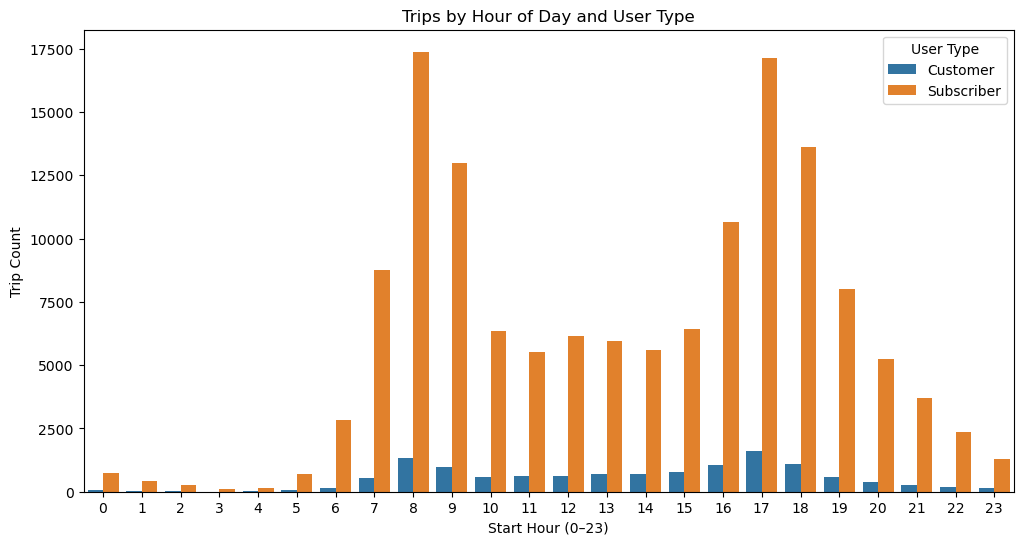

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='start_hour', hue='user_type')
plt.title('Trips by Hour of Day and User Type')
plt.xlabel('Start Hour (0–23)')
plt.ylabel('Trip Count')
plt.legend(title='User Type')
plt.show()

## (Visualization 3) Median Trip Duration by User Type & Weekday

A heatmap showing how median trip duration varies for Subscribers and Customers across weekdays.
>- Subscribers: consistently short weekday trips.
>- Customers: longest trips on weekends.


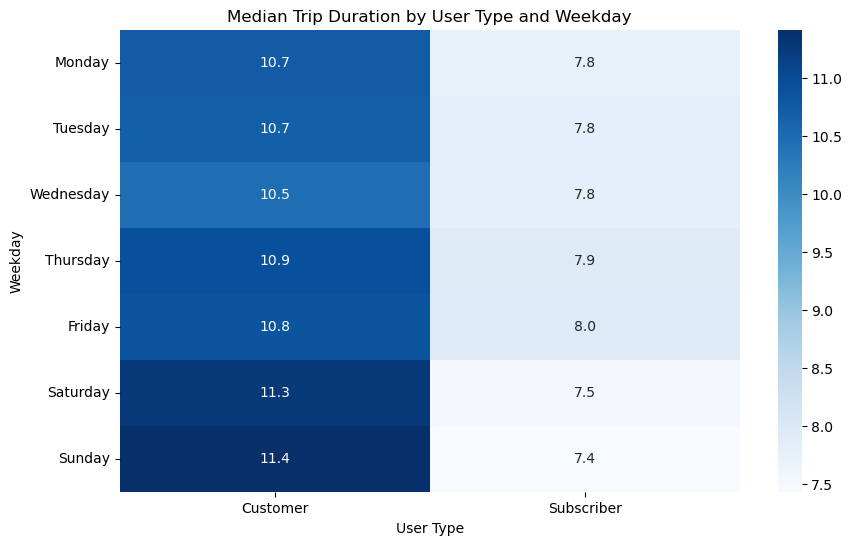

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(values='duration_minute',index='weekday',columns='user_type',aggfunc='median',observed=False),annot=True,fmt='.1f',cmap='Blues')

plt.title('Median Trip Duration by User Type and Weekday')
plt.xlabel('User Type')
plt.ylabel('Weekday')
plt.show()

## (Visualization 4) Hourly Bike Usage by Gender

>* This line plot displays how ride frequency changes throughout the day for each gender.
>* Male riders dominate overall, but all genders follow similar hourly patterns.


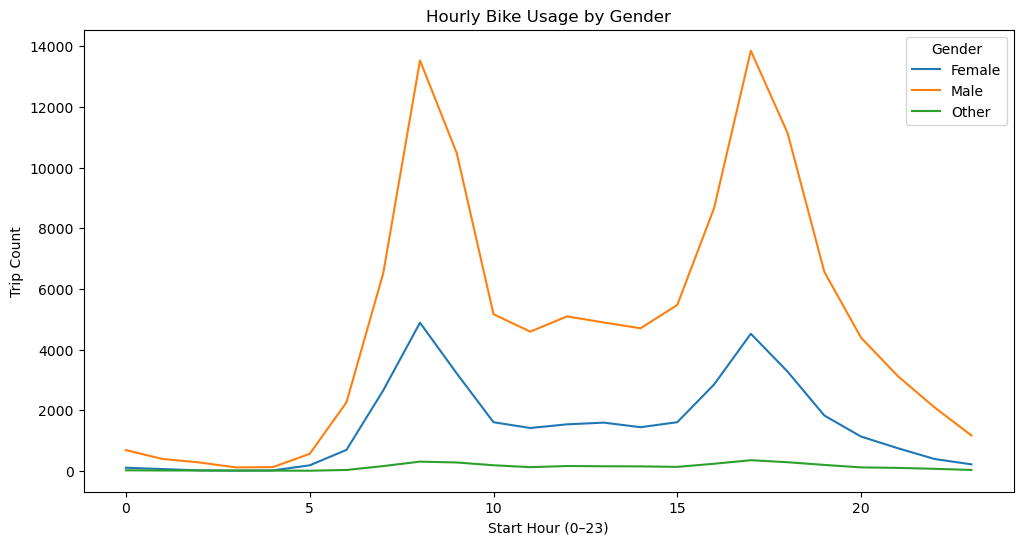

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby(['start_hour','member_gender'],observed=False).size().reset_index(name='count'), x='start_hour', y='count', hue='member_gender')
plt.title('Hourly Bike Usage by Gender')
plt.xlabel('Start Hour (0–23)')
plt.ylabel('Trip Count')
plt.legend(title='Gender')
plt.show()

## (Visualization 5) Median Trip Duration by User Type & Gender  
>* A clustered bar chart comparing median trip duration for Customers and Subscribers across genders.
>* Customers consistently take longer trips, with small differences between genders.


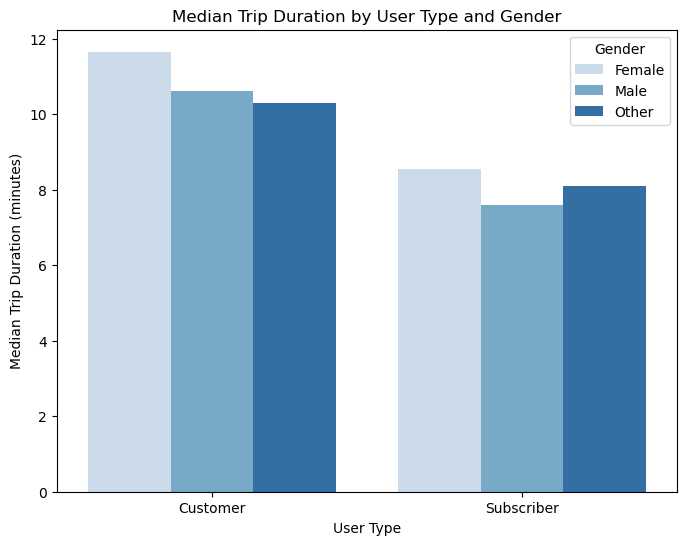

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(data=df.groupby(['user_type', 'member_gender'], observed=False)['duration_minute'].median().reset_index(), x='user_type', y='duration_minute', hue='member_gender', palette='Blues')
plt.title("Median Trip Duration by User Type and Gender")
plt.xlabel("User Type")
plt.ylabel("Median Trip Duration (minutes)")
plt.legend(title="Gender")
plt.show()

# (Conclusion)

### **Key Findings**
- Rider behavior varies by gender, user type, and time of day.
- **Subscribers** show strong weekday commuting patterns with short, consistent trips.
- **Customers** take longer, leisure-focused trips—especially on weekends.
- Gender differences exist but follow similar overall patterns, with males forming the largest user group.
- Trip duration does not strongly relate to station locations or geographic features.

### **What This Means**
These insights can guide:
- Better operational and fleet planning  
- Improved station rebalancing strategies  
- Targeted marketing for different rider groups  
- Enhanced service design and scheduling  

Thank you!


In [1]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C


[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 501411 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
